# Assignment 1 Report

This is an outline for your report to ease the amount of work required to create your report. Jupyter notebook supports markdown, and I recommend you to check out this [cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). If you are not familiar with markdown.

Before delivery, **remember to convert this file to PDF**. You can do it in two ways:
1. Print the webpage (ctrl+P or cmd+P)
2. Export with latex. This is somewhat more difficult, but you'll get somehwat of a "prettier" PDF. Go to File -> Download as -> PDF via LaTeX. You might have to install nbconvert and pandoc through conda; `conda install nbconvert pandoc`.

# Task 1

## task 1a)
Intersection-Over-Union is a validation metric that calculates the ratio of the intersected area and union area of a predicted bounding box and the ground truth bounding box.
![](task1a.png)
In the illustration above. The ground truth bounding box is the green outline, the predicted bounding box is the red outline. Grey is the intersection and Grey+Blue is the union.

$ IOU = \frac{Intersection}{Union} = \frac{Grey}{Grey+Blue}$


## task 1b)
A true positive (TP) is a correctly labeled prediction of an item belonging to the positive class. A false positive (FP) is a incorrectly labeled prediction of an item belonging to the positive class.

$ Precision = \frac{TP}{TP+FP}$

$ Recall = \frac{TP}{TP+FN}$

## task 1c)

Precision and recall curve for class 1:
Precision1 = [1.0, 1.0, 1.0, 0.5, 0.20]
Recall1 = [0.05, 0.1, 0.4, 0.7, 1.0]
Precision and recall curve for class 2:
Precision2 = [1.0, 0.80, 0.60, 0.5, 0.20]
Recall2 = [0.3, 0.4, 0.5, 0.7, 1.0]


0.6454545454545455 0.5909090909090909


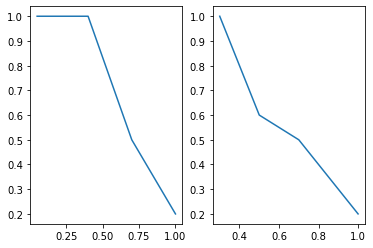

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Precision1 = [1.0, 1.0, 1.0, 0.5, 0.20]
Recall1 = [0.05, 0.1, 0.4, 0.7, 1.0]
Precision2 = [1.0, 0.80, 0.60, 0.5, 0.20]
Recall2 = [0.3, 0.4, 0.5, 0.7, 1.0]

x = np.linspace(0, 1, 11)

plt.figure()
plt.subplot(121)
plt.plot(Recall1, Precision1)
plt.subplot(122)
plt.plot(Recall2, Precision2)

#        [0, 1, 2, 3  , 4  , 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
class1 = [1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.2, 0.2, 0.2]
mAP1 = np.average(class1)
class2 = [1, 1, 1, 0.8, 0.6, 0.5, 0.5, 0.5, 0.2, 0.2, 0.2]
mAP2 = np.average(class2)

print(mAP1, mAP2)

In [9]:
import numpy as np


array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

# Task 2

### Task 2f)


# Task 3

### Task 3a)
Fill in task 1a image of hand-written notes which are easy to read, or latex equations here

### Task 3b)
Fill in task 1a image of hand-written notes which are easy to read, or latex equations here

### Task 3c)
Fill in task 1a image of hand-written notes which are easy to read, or latex equations here


### Task 3d)
Fill in task 1a image of hand-written notes which are easy to read, or latex equations here

### Task 3e)
Fill in task 1a image of hand-written notes which are easy to read, or latex equations here

### Task 3f)
Fill in task 1a image of hand-written notes which are easy to read, or latex equations here


# Task 4

## Task 4b)

FILL IN ANSWER. 

## Task 4c)
FILL IN ANSWER. 


## Task 4d)
FILL IN ANSWER. 


## Task 4e)
FILL IN ANSWER. 


## Task 4f)
FILL IN ANSWER. 